# JOHNATAN MEOÑO

In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
features = np.array([[0,0],
                     [0,1],
                     [1,0],
                     [1,1]])

In [5]:
features

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [6]:
etiquetas = np.array([[0],
                      [1],
                      [1],
                      [0]])

In [7]:
u_1 = np.ones((4,1))
u_1

array([[1.],
       [1.],
       [1.],
       [1.]])

In [8]:
mu, sigma = 0, 0.1 # mean and standard deviation

In [9]:
w_1 = np.random.normal(mu, sigma,(2,2))
w_1

array([[-0.01708468,  0.15703812],
       [ 0.05031376,  0.10149926]])

In [10]:
b_1 = np.random.normal(mu, sigma, (1,2))
b_1

array([[ 0.08044622, -0.12444066]])

# ////////////////////////

In [11]:
u_2 = np.ones((4,1))
u_2

array([[1.],
       [1.],
       [1.],
       [1.]])

In [12]:
w_2 = np.random.normal(mu, sigma, (2,2))
w_2

array([[-0.13487116,  0.09023639],
       [-0.00832797, -0.01518753]])

In [13]:
b_2 = np.random.normal(mu, sigma, (1,2))
b_2

array([[-0.0043017 , -0.11956453]])

# ////////////////////////

In [14]:
u_f = np.ones((4,1))
u_f

array([[1.],
       [1.],
       [1.],
       [1.]])

In [15]:
w_f = np.random.normal(mu, sigma, (2,1))
w_f

array([[ 0.25936657],
       [-0.00675252]])

In [16]:
b_f = np.random.normal(mu, sigma, (1,1))
b_f

array([[0.16386763]])

In [17]:
def relu(x):
    activacion = np.maximum(x,0)
    return activacion 

In [18]:
def relu_deri(x):
    derivada = (x >=0).astype(float)
    return derivada 

In [19]:
def red(equix,y,p_1,p_2,p_f,ba_1,ba_2,ba_f,u1,u2,uf,lr=0.1,epochs=20,imprimir=2): #epochs=20,lr=1
    
    for i in range(epochs):
        ## forward propagation
        ## capa intermedia 1
        kpa_inter_1 = np.matmul(equix,p_1) + ba_1
        kpa_inter_1_act = relu(kpa_inter_1)
    
        ## capa intermedia 2
        kpa_inter_2 = np.matmul(kpa_inter_1_act,p_2) + ba_2
        kpa_inter_2_act = relu(kpa_inter_2)
    
        ## capa final sin activacion
        kpa_final = np.matmul(kpa_inter_2_act,p_f) + ba_f
    
        ## backward propagation
        ## propagacion del error
        
        ## del final a inicio
        ## calculo del error en la capa final
        ## derivada del costo respecto de la activacion 
        ## por la derivada de la ativacion lo cual da como resultado
        ## ver las hojas a mano
        delta_f = y - kpa_final 
    
        ## error en la capa intermedia 2
        delta_kpa_inter_2 = np.matmul(p_f,delta_f.T).T * relu_deri(kpa_inter_2)
     
        ## error en la capa inter 1
        delta_kpa_inter_1 = np.matmul(p_2,delta_kpa_inter_2.T).T * relu_deri(kpa_inter_1)
    
        ## Gradientes
        ## del inicio al final        
        ## gradiente capa intermedia 1
        G_kpa_inter_1 = np.mean(np.matmul(equix,delta_kpa_inter_1.T), axis = 0).reshape(2,2)
        
        ## gradiente capa intermedia 2
        G_kpa_inter_2 = np.mean(np.matmul(kpa_inter_1_act,delta_kpa_inter_2.T), axis = 0).reshape(2,2)
        
        ## gradiente capa final
        G_kpa_f = np.matmul(kpa_inter_2_act.T,delta_f)
        
        ## bias
        ## del inicio al final
        ## bias capa intermida 1
        b_kpa_inter_1 = np.matmul(u1.T,delta_kpa_inter_1)
        
        ## bias capa intermida 1
        b_kpa_inter_2 = np.matmul(u2.T,delta_kpa_inter_2)
        
        ## bias capa final
        b_kpa_f = np.matmul(uf.T,delta_f)       
          
        ## pesos actualizados
        p_f = p_f - (lr * G_kpa_f)
        p_2 = p_2 - (lr * G_kpa_inter_2)
        p_1 = p_1 - (lr * G_kpa_inter_1)
        
        ## bias actualizados
        ba_f = ba_f - (lr * b_kpa_f)
        ba_2 = ba_2 - (lr * b_kpa_inter_2)
        ba_1 = ba_1 - (lr * b_kpa_inter_1)
        
        ## error MSE
        error = (np.mean(np.power(y-kpa_final,2)))*0.5
        
        if i % imprimir == 0: 
            print("Error", i, error)
       
    ## Gráfica 
    fig  = plt.figure(figsize=(10,5))
    ax1 = fig.add_subplot(1,1,1)
    ax1.scatter(kpa_inter_2_act[:,0],kpa_inter_2_act[:,1])
    plt.show()
    
    return kpa_inter_2_act

        #print(ba_1)
        #print()
        #print(p_2)

Error 0 0.28711021244823265
Error 1 0.2871115186148513
Error 2 0.28711282479203637
Error 3 0.2871141309797878
Error 4 0.2871154371781057
Error 5 0.28711674338699045
Error 6 0.2871180496064418
Error 7 0.28711935583646014
Error 8 0.2871206620770451
Error 9 0.2871219683281973
Error 10 0.2871232745899166
Error 11 0.2871245808622029
Error 12 0.2871258871450565
Error 13 0.28712719343847737
Error 14 0.2871284997424658
Error 15 0.28712980605702165
Error 16 0.28713111238214517
Error 17 0.28713241871783635
Error 18 0.28713372506409524
Error 19 0.2871350314209219


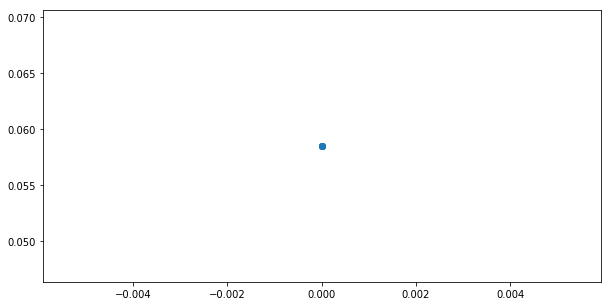

array([[0.        , 0.05850943],
       [0.        , 0.05850943],
       [0.        , 0.05850943],
       [0.        , 0.05850943]])

In [50]:
red(features,etiquetas,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_f,0.000001,20,1)

Error 0 0.19063587239451926
Error 100 0.1906897280329645
Error 200 0.19074362749142576
Error 300 0.19079757080521634
Error 400 0.19085155800967757
Error 500 0.1909055891401789
Error 600 0.19095966423211827
Error 700 0.19101378332092175
Error 800 0.19106794644204358
Error 900 0.1911221536309665


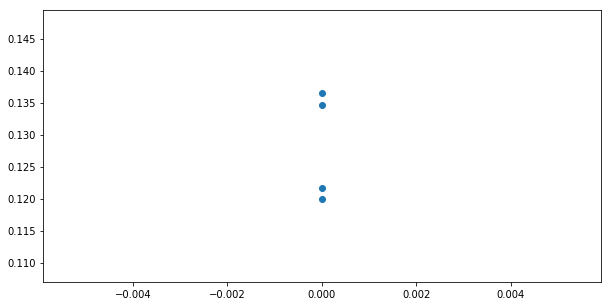

array([[0.        , 0.11997259],
       [0.        , 0.12171755],
       [0.        , 0.13468289],
       [0.        , 0.13652659]])

In [51]:
red(features,etiquetas,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_f,0.000001,1000,100)

Error 0 0.23081154090780914
Error 100 0.23089949397325307
Error 200 0.2309875212781346
Error 300 0.23107562288700312
Error 400 0.23116379886446722
Error 500 0.23125204927519488
Error 600 0.23134037418391354
Error 700 0.23142877365541015
Error 800 0.23151724775453122
Error 900 0.23160579654618293


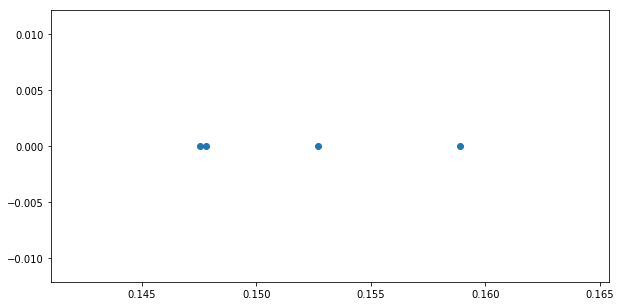

array([[0.15890459, 0.        ],
       [0.15268696, 0.        ],
       [0.14778817, 0.        ],
       [0.1475247 , 0.        ]])

In [52]:
red(features,etiquetas,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_f,0.000001,1000,100)

Error 0 0.2094920941798455
Error 100 0.20956316147867288
Error 200 0.20963428873189374
Error 300 0.2097054759907208
Error 400 0.2097767233064118
Error 500 0.20984803073026984
Error 600 0.20991939831364326
Error 700 0.2099908261079257
Error 800 0.2100623141645561
Error 900 0.21013386253501884


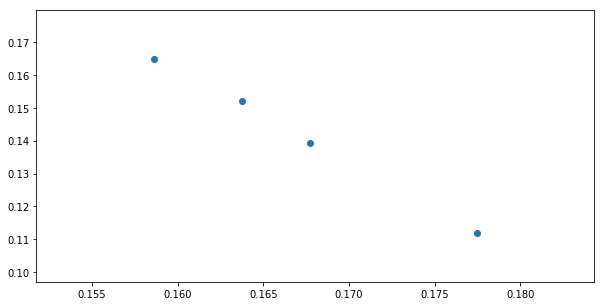

array([[0.16374089, 0.15209043],
       [0.17745804, 0.11185082],
       [0.15861964, 0.16496693],
       [0.16774921, 0.13922552]])

In [53]:
red(features,etiquetas,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_f,0.000001,1000,100)

Error 0 0.31746696718604683
Error 100 0.3176210020574596
Error 200 0.3177751602058271
Error 300 0.3179294417298101
Error 400 0.3180838467281486
Error 500 0.31823837529966137
Error 600 0.31839302754324617
Error 700 0.31854780355788015
Error 800 0.3187027034426194
Error 900 0.31885772729659967


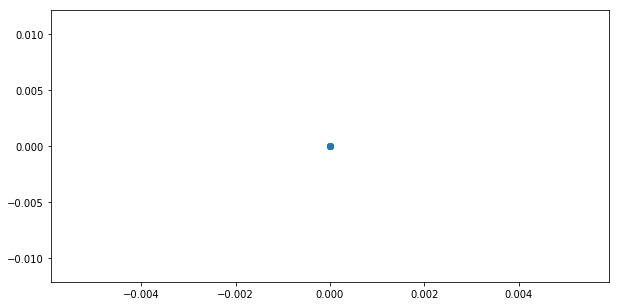

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [54]:
red(features,etiquetas,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_f,0.000001,1000,100)

Error 0 0.3498611096782689
Error 100 0.35004109720752913
Error 200 0.3502212287949123
Error 300 0.35040150455572117
Error 400 0.35058192460535087
Error 500 0.35076248905928825
Error 600 0.35094319803311336
Error 700 0.35112405164249827
Error 800 0.3513050500032082
Error 900 0.3514861932311003


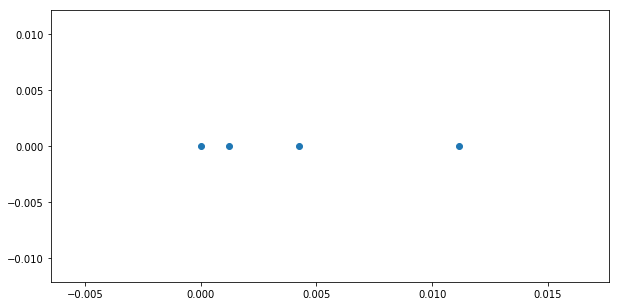

array([[0.        , 0.        ],
       [0.00121729, 0.        ],
       [0.00424075, 0.        ],
       [0.01116932, 0.        ]])

In [55]:
red(features,etiquetas,np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,2)),np.random.normal(mu, sigma,(2,1)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,2)),np.random.normal(mu, sigma,(1,1)),u_1,u_2,u_f,0.000001,1000,100)

# Coclusiones

# En general podemos decir que es importante la correcta inicializacion de los parametros entrenables ya que de esto dependera una buena convergencia y minimizacion del error

# Del resultado de la capa intermedia dos y su gráfica se puede decir que hay momentos donde la variable x1 se centra en cero para cualquier valor de x2, y hay momentos donde la variable x2 se centra en cero para cualquier valor de x1. Esta ubicación en cero se debe a la activación Relu.

# Esta efecto de centrar en cero tambien da como resultado que se generen rectas horizontales o verticales.

# Los casos donde no se centra en cero ninguna de las variables provoca graficas de lineas rectas inclinadas

# Tambien se obervaron casos donde la grafica resultante era un solo punto ya que tanto x1 como x2 estaban centradas en cero coma cero.

# Area de pruebas

In [198]:
neg = np.array([-1,10,-5,100])
neg

array([ -1,  10,  -5, 100])

In [199]:
relu(neg)

array([  0,  10,   0, 100])

In [200]:
relu_deri(neg)

array([0., 1., 0., 1.])

In [43]:
cero = np.matmul(features,w_1)
cero

array([[0.69648159, 0.79673319],
       [1.09817758, 1.10043361],
       [1.51207152, 1.27826136],
       [1.91376751, 1.58196177]])

In [45]:
uno = np.matmul(cero,w_2)
uno

array([[0.63104658, 0.83758842],
       [0.97874446, 1.29241068],
       [1.32290423, 1.73654471],
       [1.6706021 , 2.19136696]])

In [48]:
dos = np.matmul(uno,w_3)
dos

array([[0.63756453],
       [0.98596067],
       [1.32818598],
       [1.67658212]])

In [96]:
cero_uno = np.array([[0,1]
                    ])
cero_uno

array([[0, 1]])

In [97]:
cero * cero_uno

array([[0.        , 0.79673319],
       [0.        , 1.10043361],
       [0.        , 1.27826136],
       [0.        , 1.58196177]])

In [99]:
prueba_1 = np.array([[0],
                     [1]
                    ])
prueba_1.T

array([[0, 1]])

In [118]:
prueba_2 = np.array([[1,2],
                     [1,2],
                     [1,2],
                     [1,2],
                    ])
prueba_2.T

array([[1, 1, 1, 1],
       [2, 2, 2, 2]])

In [150]:
prueba_3 = np.array([[1,2,3],
                     [1,2,3],
                     [1,2,3],
                     [1,2,3]])
prueba_3

array([[1, 2, 3],
       [1, 2, 3],
       [1, 2, 3],
       [1, 2, 3]])

In [152]:
prueba_4 = np.array([[0,1],
                     [0,1],
                     [0,1],
                     [0,1]])
prueba_4

array([[0, 1],
       [0, 1],
       [0, 1],
       [0, 1]])

In [153]:
prueba_3*prueba_4

ValueError: operands could not be broadcast together with shapes (4,3) (4,2) 

In [154]:
features[:,0:2]

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/

https://intellipaat.com/community/6716/how-to-implement-the-relu-function-in-numpy

https://stackoverflow.com/questions/16869990/how-to-convert-from-boolean-array-to-int-array-in-python